## Data Preparation

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib
import plotly.express as px
import seaborn as sns
import missingno
#Note, if using jupyter lab, install the plotly extension for jupyter lab
#conda install -c conda-forge jupyterlab-plotly-extension
#original file:  "https://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls"

In [3]:
#Pandas set max columns so you can see everything!
pd.set_option('display.max_columns', None)
#OR
#pd.set_option('max_columns', 100)

In [4]:
#df_train = pd.read_csv("data/train.csv")
#Switch to using the original excel file with all rows
#df_train = pd.read_excel("data/AmesHousing.xls")
df_train = pd.read_csv("phase2export.csv")

## Missing Data
- Need to remove some columns
- for example, poolqc was missing 95% of values along with Misc column?
- For numeric columns should we replace missing values with mean or median?

In [5]:
#fillna with mean
df_train = df_train.fillna(df_train.mean())

## Categorical Data
- get_dummies but is this is this the best way?  Should we explore one hot encoder?

In [6]:
#deal with categorical data
df_train = pd.get_dummies(df_train)

## Regularization of Skewed Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C1DC129250>,
      dtype=object)

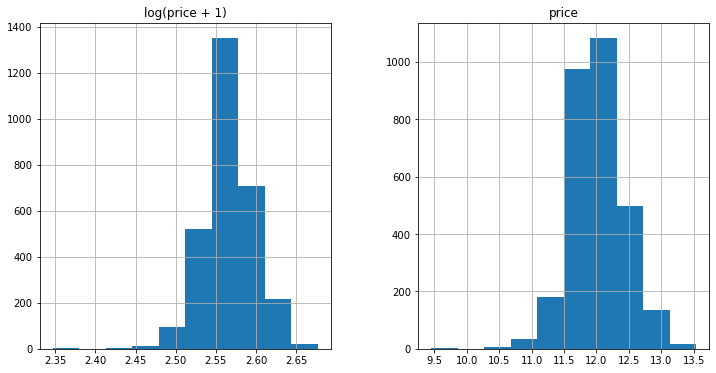

In [11]:
#Handy to check histograms side by side (log vs no log)
#https://www.kaggle.com/apapiu/regularized-linear-models
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":df_train["SalePrice"], "log(price + 1)":np.log1p(df_train["SalePrice"])})
prices.hist()

In [7]:
#Regularize saleprice take the log
#https://www.khanacademy.org/math/algebra2/x2ec2f6f830c9fb89:logs/x2ec2f6f830c9fb89:log-intro/a/intro-to-logarithms
#log1p = ln(saleprice + 1)
df_train["SalePrice_log"] = np.log1p(df_train["SalePrice"])
#Note syntax to print more than 1 column
print(df_train[['SalePrice_log', 'SalePrice']])

      SalePrice_log  SalePrice
0         12.278398     215000
1         11.561725     105000
2         12.055256     172000
3         12.404928     244000
4         12.154258     189900
...             ...        ...
2925      11.867104     142500
2926      11.782960     131000
2927      11.790565     132000
2928      12.043560     170000
2929      12.144203     188000

[2930 rows x 2 columns]


In [8]:
from scipy.stats import skew
from scipy.stats.stats import pearsonr

numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df_train[skewed_feats] = np.log1p(df_train[skewed_feats])

## Outliers
- Need a statistical way to remove outliers
- Author of data reccomends removing everything above 4000 sq feet but need to prove with stats

## Deal with Categorical Data

In [10]:
#call get_dummies to convert categorical variables to numeric
df_train = pd.get_dummies(df_train)
#df_train = df_train.fillna(df_train.mean())